# Stock Market Prediction using Numerical and Textual Analysis

### Importing required libraries

In [60]:

import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.vector_ar.var_model import VAR

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Loading Historical Stock Price Data(Numerical)

In [2]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-11-02,3079.709961,2950.120117,3061.739990,3004.479980,7257400.0,3004.479980,AMAZON
2020-11-03,3074.899902,2980.979980,3018.530029,3048.409912,4897900.0,3048.409912,AMAZON
2020-11-04,3244.850098,3139.729980,3159.989990,3241.159912,6839000.0,3241.159912,AMAZON
2020-11-05,3366.800049,3288.879883,3319.969971,3322.000000,5789300.0,3322.000000,AMAZON
2020-11-06,3322.000000,3232.000000,3304.639893,3311.370117,4647300.0,3311.370117,AMAZON
2020-11-09,3289.000000,3112.110107,3231.030029,3143.739990,7190400.0,3143.739990,AMAZON
2020-11-10,3114.000000,3019.479980,3095.020020,3035.020020,6591000.0,3035.020020,AMAZON
2020-11-11,3139.149902,3050.000000,3061.780029,3137.389893,4366900.0,3137.389893,AMAZON
2020-11-12,3175.879883,3086.050049,3159.949951,3110.280029,4362000.0,3110.280029,AMAZON


In [5]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,89.535565,87.007163,88.255883,88.344285,1.530015e+08,87.696834
std,20.642586,19.870425,20.457008,20.224569,7.377716e+07,20.571140
min,57.125000,53.152500,57.020000,56.092499,2.880380e+07,55.291519
25%,71.971878,70.141251,71.029375,71.588125,1.055816e+08,70.565872
50%,80.998749,79.614998,80.299999,80.375000,1.354628e+08,79.484314
75%,112.259998,108.771877,110.428123,110.364998,1.848412e+08,110.174921
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-11-15 to 2020-11-13
Data columns (total 7 columns):
High            252 non-null float64
Low             252 non-null float64
Open            252 non-null float64
Close           252 non-null float64
Volume          252 non-null float64
Adj Close       252 non-null float64
company_name    252 non-null object
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


### Let's see a historical view of the closing price

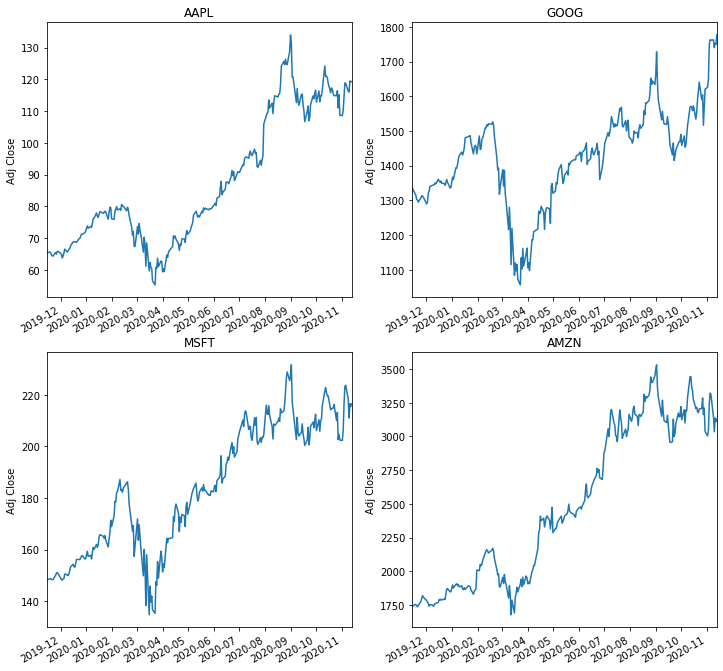

In [7]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

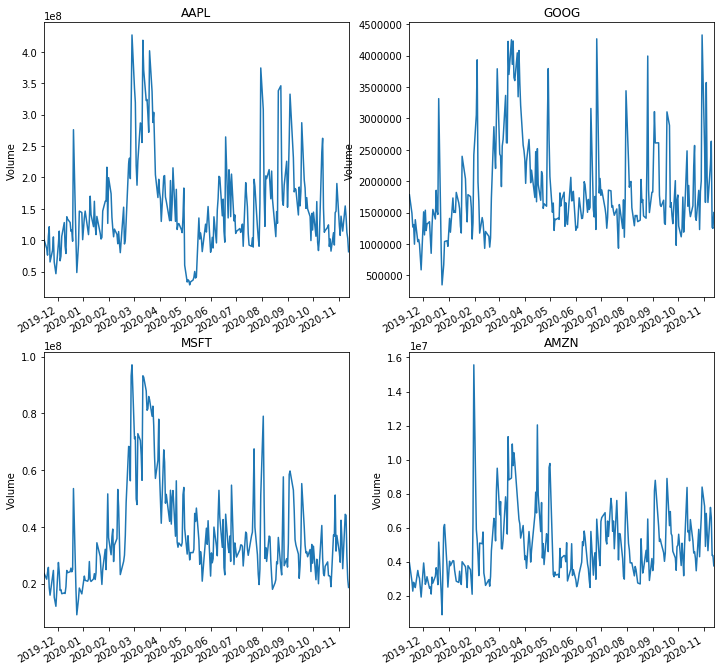

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day

 #### moving average of the various stocks

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

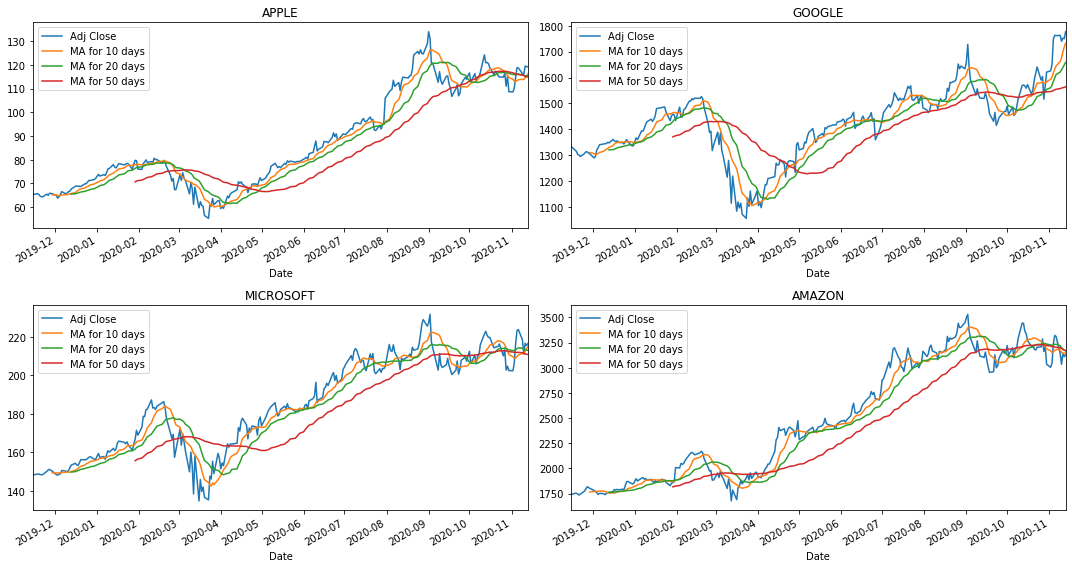

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

###  an overall look at the average daily return using a histogram.

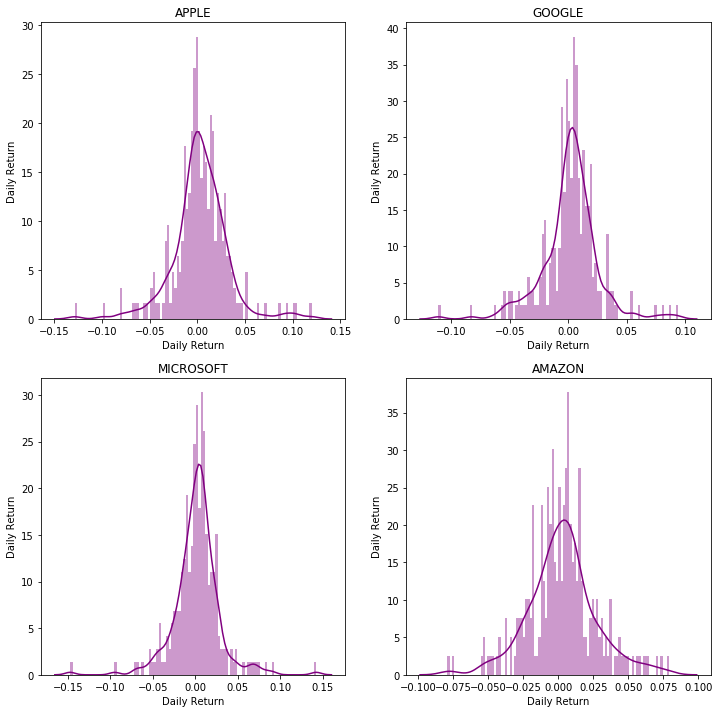

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

### How much value do we put at risk by investing in a particular stock?

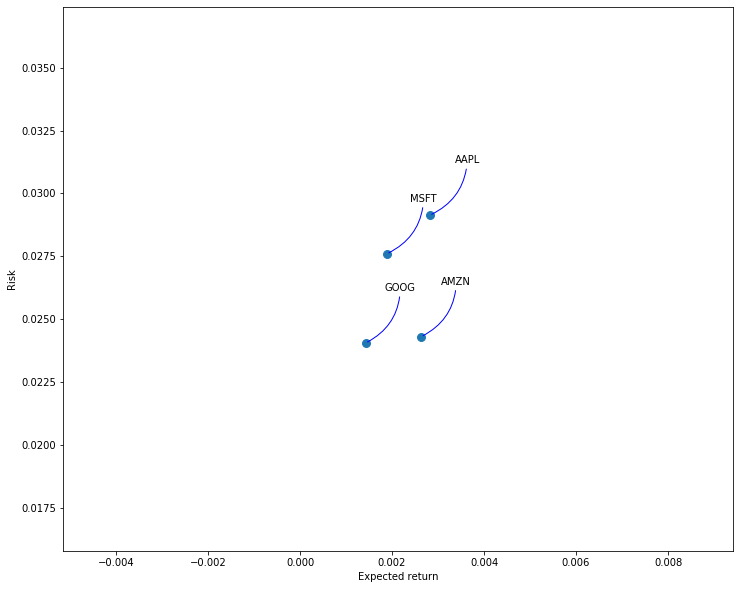

In [13]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
tech_rets = closing_df.pct_change()
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price of APPLE inc

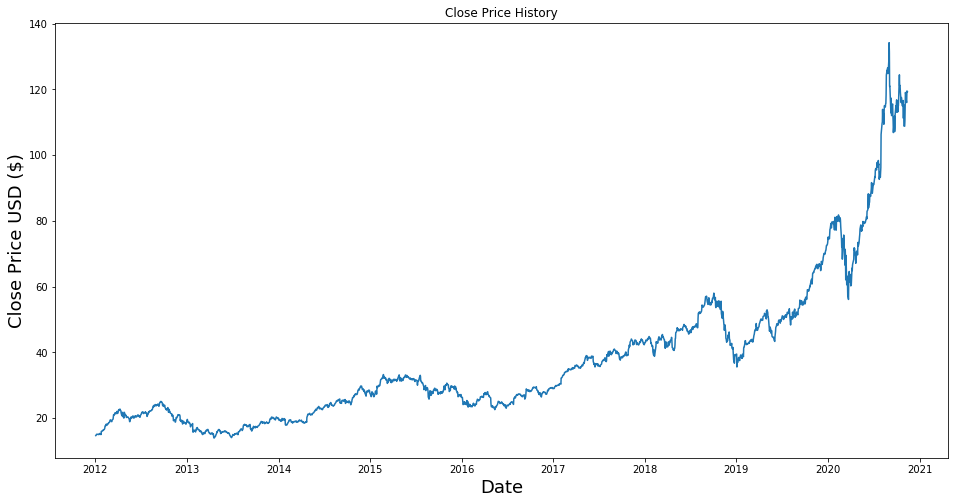

In [14]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Loading Textual (News) data

In [15]:
cols = ['Date','News']
ndf = pd.read_csv('abcnews-date-text.csv', names = cols)
ndf

,Date,News
0,publish_date,headline_text
1,20030219,aba decides against community broadcasting lic...
2,20030219,act fire witnesses must be aware of defamation
3,20030219,a g calls for infrastructure protection summit
4,20030219,air nz staff in aust strike for pay rise
...,...,...
1186014,20191231,vision of flames approaching corryong in victoria
1186015,20191231,wa police and government backflip on drug amne...
1186016,20191231,we have fears for their safety: victorian premier
1186017,20191231,when do the 20s start


In [16]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186019 entries, 0 to 1186018
Data columns (total 2 columns):
Date    1186019 non-null object
News    1186019 non-null object
dtypes: object(2)
memory usage: 18.1+ MB


### Data Pre-Processing

Here we will perform Data Preprocessing on our  dataset first, to make the data usable for Sentiment Analysis.

In [17]:
ndf.drop(0, inplace=True)

ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186018 entries, 1 to 1186018
Data columns (total 2 columns):
Date    1186018 non-null object
News    1186018 non-null object
dtypes: object(2)
memory usage: 27.1+ MB


In [18]:
#Converting data type of Date column 
ndf['Date'] = pd.to_datetime(ndf['Date'],format= '%Y%m%d')
ndf

,Date,News
1,2003-02-19,aba decides against community broadcasting lic...
2,2003-02-19,act fire witnesses must be aware of defamation
3,2003-02-19,a g calls for infrastructure protection summit
4,2003-02-19,air nz staff in aust strike for pay rise
5,2003-02-19,air nz strike to affect australian travellers
...,...,...
1186014,2019-12-31,vision of flames approaching corryong in victoria
1186015,2019-12-31,wa police and government backflip on drug amne...
1186016,2019-12-31,we have fears for their safety: victorian premier
1186017,2019-12-31,when do the 20s start


In [19]:
#Grouping the headlines for each day
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace = True, drop = True)
ndf


,Date,News
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-20,15 dead in rebel bombing raid philippines army...
2,2003-02-21,accc too timid in petrol price investigations ...
3,2003-02-22,86 confirmed dead after us nightclub fire act ...
4,2003-02-23,accused people smuggler to face darwin court a...
...,...,...
6147,2019-12-27,abc pic of the week best of 2019 alexei navaln...
6148,2019-12-28,acosia red elk demonstrating jingle dress danc...
6149,2019-12-29,alcohol addiction made me a drug dealer and se...
6150,2019-12-30,aerial firefighting over bundoora african swin...


In [20]:
ndf['News']

0       aba decides against community broadcasting lic...
1       15 dead in rebel bombing raid philippines army...
2       accc too timid in petrol price investigations ...
3       86 confirmed dead after us nightclub fire act ...
4       accused people smuggler to face darwin court a...
                              ...                        
6147    abc pic of the week best of 2019 alexei navaln...
6148    acosia red elk demonstrating jingle dress danc...
6149    alcohol addiction made me a drug dealer and se...
6150    aerial firefighting over bundoora african swin...
6151    abc reporter liv casben had to seek shelter at...
Name: News, Length: 6152, dtype: object

# Sentiment Analysis

In [21]:
polarity = []
subjectivity = []
tuples = []
for i in ndf['News'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [22]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [23]:
ndf['Polarity'] = np.array(polarity)
ndf['Subjectivity'] = np.array(subjectivity)

In [24]:
ndf.head()

,Date,News,Polarity,Subjectivity
0,2003-02-19,aba decides against community broadcasting lic...,0.020692,0.306379
1,2003-02-20,15 dead in rebel bombing raid philippines army...,0.048356,0.352210
2,2003-02-21,accc too timid in petrol price investigations ...,0.020940,0.432369
3,2003-02-22,86 confirmed dead after us nightclub fire act ...,0.085326,0.331419
4,2003-02-23,accused people smuggler to face darwin court a...,0.017982,0.353892


In [25]:
#Adding sentiment score to ndf
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(ndf)):
    pol = ndf.iloc[i]['Polarity']
    sub = ndf.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [26]:
ndf['Sentiment'] = polarity
ndf['Opinion'] = subjectivity

In [27]:
ndf.head()

,Date,News,Polarity,Subjectivity,Sentiment,Opinion
0,2003-02-19,aba decides against community broadcasting lic...,0.020692,0.306379,Neutral,Factual
1,2003-02-20,15 dead in rebel bombing raid philippines army...,0.048356,0.352210,Neutral,Factual
2,2003-02-21,accc too timid in petrol price investigations ...,0.020940,0.432369,Neutral,Public
3,2003-02-22,86 confirmed dead after us nightclub fire act ...,0.085326,0.331419,Neutral,Factual
4,2003-02-23,accused people smuggler to face darwin court a...,0.017982,0.353892,Neutral,Factual


In [28]:
ndf.tail()

,Date,News,Polarity,Subjectivity,Sentiment,Opinion
6147,2019-12-27,abc pic of the week best of 2019 alexei navaln...,0.147156,0.403056,Neutral,Public
6148,2019-12-28,acosia red elk demonstrating jingle dress danc...,0.066252,0.334993,Neutral,Factual
6149,2019-12-29,alcohol addiction made me a drug dealer and se...,0.105008,0.388762,Neutral,Factual
6150,2019-12-30,aerial firefighting over bundoora african swin...,0.085472,0.327228,Neutral,Factual
6151,2019-12-31,abc reporter liv casben had to seek shelter at...,0.029711,0.371789,Neutral,Factual


In [29]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6152 entries, 0 to 6151
Data columns (total 6 columns):
Date            6152 non-null datetime64[ns]
News            6152 non-null object
Polarity        6152 non-null float64
Subjectivity    6152 non-null float64
Sentiment       6152 non-null object
Opinion         6152 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 288.5+ KB


## Visualization of Distributed Sentiments

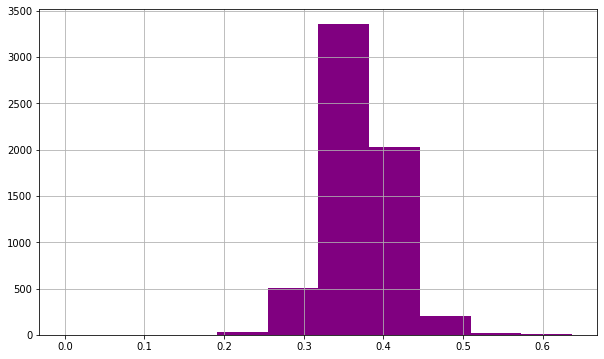

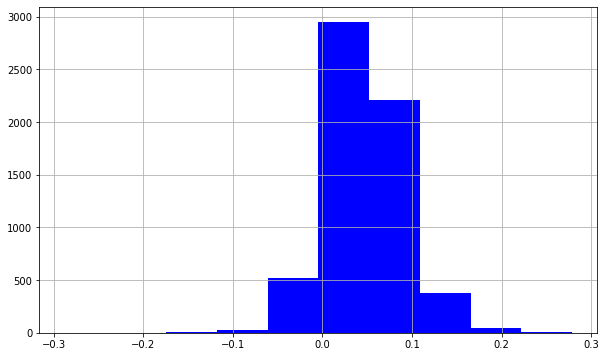

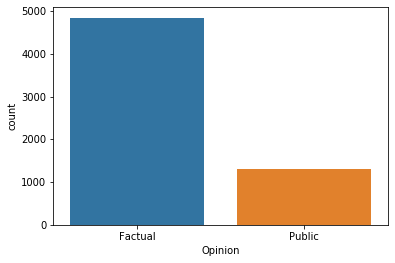

In [30]:
plt.figure(figsize=(10,6))
ndf['Subjectivity'].hist(color = 'purple')
plt.show()
plt.figure(figsize=(10,6))
ndf['Polarity'].hist(color = 'blue')
plt.show()
sns.countplot(ndf['Opinion'])

## Hybrid model Analysis

#### Merging two dataframe for performing hybrid analysis

In [35]:
mdf = ndf.merge(df,  how='inner', on='Date', left_index = True)

In [41]:
mdf['hl_pct']=((mdf['High']-mdf['Low'])/mdf['Low'])*100
mdf['pct_change']=((mdf['Close']-mdf['Open'])/mdf['Open'])*100

In [42]:
mdf = mdf.drop(['Open','High','Close','Low'], axis=1)
mdf.head()

,Date,News,Polarity,Subjectivity,Sentiment,Opinion,Volume,Adj Close,hl_pct,pct_change
0,2012-01-03,2011 a cool wet year for queensland 33 deaths ...,0.102837,0.366783,Neutral,Factual,302220800.0,12.566676,0.855746,0.446996
1,2012-01-04,13yo girl charged with knife taxi assault 2011...,0.059204,0.359550,Neutral,Factual,260022000.0,12.634213,1.319394,0.839024
2,2012-01-05,31 killed in mexican prison riot abc business ...,-0.000765,0.277294,Neutral,Factual,271269600.0,12.774481,1.424868,0.742256
3,2012-01-06,2012 0106 second arrest over taxi bashing thef...,0.062116,0.338347,Neutral,Factual,318292800.0,12.908023,0.842037,0.626532
4,2012-01-09,abc business news abc business news and market...,0.070863,0.369879,Neutral,Factual,394024400.0,12.887549,1.518930,-0.886015


In [43]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2011
Data columns (total 10 columns):
Date            2012 non-null datetime64[ns]
News            2012 non-null object
Polarity        2012 non-null float64
Subjectivity    2012 non-null float64
Sentiment       2012 non-null object
Opinion         2012 non-null object
Volume          2012 non-null float64
Adj Close       2012 non-null float64
hl_pct          2012 non-null float64
pct_change      2012 non-null float64
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 172.9+ KB


### Required Column

In [45]:
req_df = mdf[['Polarity', 'Subjectivity','Adj Close','hl_pct','pct_change']]
req_df.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
0,0.102837,0.366783,12.566676,0.855746,0.446996
1,0.059204,0.359550,12.634213,1.319394,0.839024
2,-0.000765,0.277294,12.774481,1.424868,0.742256
3,0.062116,0.338347,12.908023,0.842037,0.626532
4,0.070863,0.369879,12.887549,1.518930,-0.886015


### Feature Scaling using MinMaxScaler

In [48]:

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(req_df))
df.columns = req_df.columns
df.index=req_df.index
df.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
0,0.759676,0.664742,0.007596,0.024011,0.461868
1,0.617294,0.651634,0.008721,0.050010,0.487442
2,0.421602,0.502556,0.011055,0.055924,0.481130
3,0.626796,0.613206,0.013278,0.023242,0.473581
4,0.655340,0.670355,0.012937,0.061199,0.374909


## Training of hybrid model

In [54]:
train = df1[: int(0.7*(len(df1)))]  #70 percent
test = df1[int(0.7*(len(df1))):] 

In [55]:
model = VAR(endog = train)
fitted = model.fit()

#### Predicted VS Test

In [56]:

pred = fitted.forecast(fitted.y, steps=len(test))
predicted = pd.DataFrame(pred, columns=df1.columns)

In [57]:
predicted.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
0,0.561375,0.660628,0.424458,0.048582,0.424298
1,0.562002,0.655542,0.424711,0.053084,0.435947
2,0.562471,0.654643,0.424958,0.053208,0.434124
3,0.562493,0.654537,0.425208,0.053424,0.434345
4,0.562487,0.654520,0.425458,0.053470,0.434305


In [58]:

test.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
1408,0.469361,0.681455,0.429460,0.102155,0.493584
1409,0.456880,0.532594,0.433324,0.052150,0.506439
1410,0.470536,0.660708,0.413101,0.170762,0.245857
1411,0.589345,0.626259,0.421649,0.065848,0.469367
1412,0.569286,0.687561,0.431028,0.027596,0.454410


### Checking the accuracy

In [61]:
np.sqrt(mean_squared_error(predicted['Adj Close'], test['Adj Close']))

0.12863460897830611